# Model Development: Used Car Pricing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/32/63/ed228892adad313aab0d0f9261241e7bf1efe36730a2788ad424bcad00ca/scikit_learn-1.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to 

In [9]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(file_path)

### 1. Linear Regression and Multiple Linear Regression

#### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
X = df[['highway-mpg']]
Y = df['price']

In [18]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [27]:
# We can output the prediction
Yhat=lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [30]:
# What is the value of the intercept?
a = lm.intercept_
a

np.float64(38423.3058581574)

In [32]:
# What is the value of the slope?
b = lm.coef_
b

array([-821.73337832])

#### What is the final estimated linear model we get?
- Yhat = a + bx
- Price = 38423.31 - 821.73 x highway-mpg

#### <span style="color:red">Question #1 a): Create a linear regression object called "lm1"</span>

In [41]:
lm1 = LinearRegression()
lm1

LinearRegression()

#### <span style="color:red">Question #1 b): Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</span>

In [45]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

#### <span style="color:red">Question #1 c): Find the slope and intercept of the model.</span>

In [46]:
# Slope
lm1.coef_

array([[166.86001569]])

In [47]:
# intercept
lm1.intercept_

array([-7963.33890628])

#### <span style="color:red">Question #1 d): What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</span>

- Yhat = -7963.34 + 166.86*X
- Price = -7963.34 + 166.86*df["engine-size"]

### Multiple Linear Regression

In [48]:
# Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [49]:
# What is the value of the intercept(a)?
lm.intercept_

np.float64(-15806.62462632922)

In [50]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### What is the final estimated linear model that we get?
- Yhat = a + b1X1 + b2X2 + b3X3 + b4X4
- Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

#### <span style="color:red">Question #2 a): Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".</span>

In [52]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

#### <span style="color:red">Question #2 b): Find the coefficient of the model.</span>

In [53]:
# Coefficient
lm2.coef_

array([   1.49789586, -820.45434016])

In [54]:
# intercept
lm2.intercept_

np.float64(38201.31327245728)

### 2. Model Evaluation Using Visualization

#### Regression Pot

(0.0, 48185.27784981009)

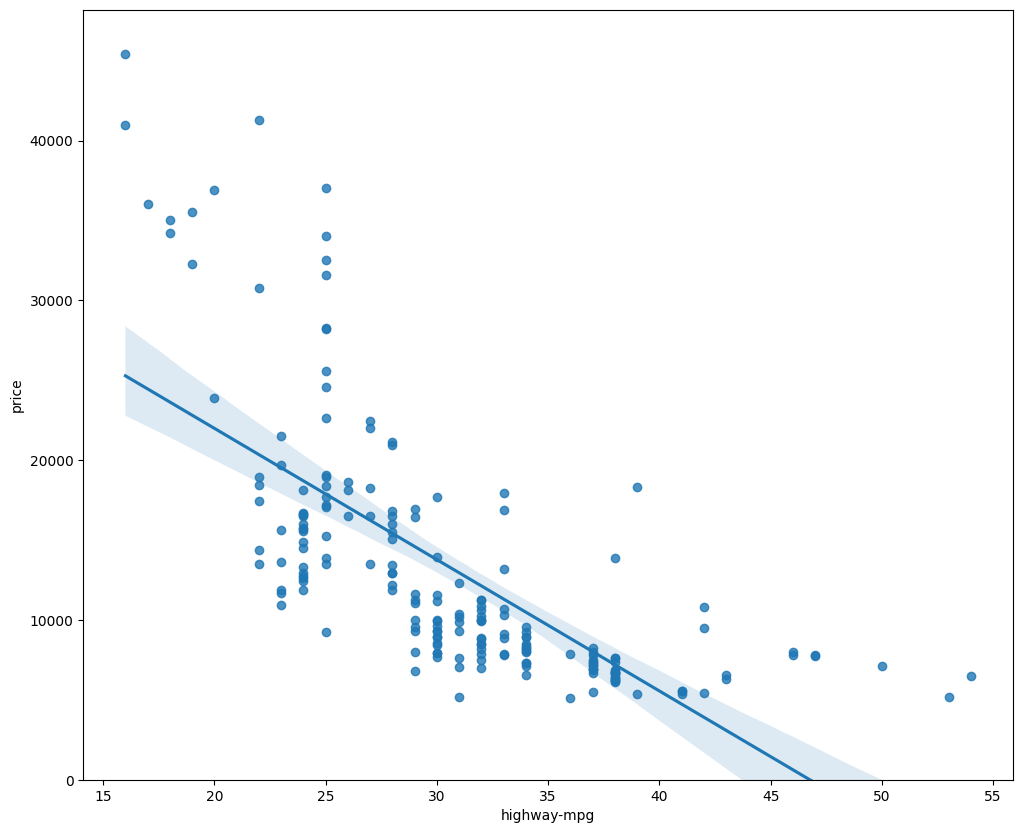

In [57]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

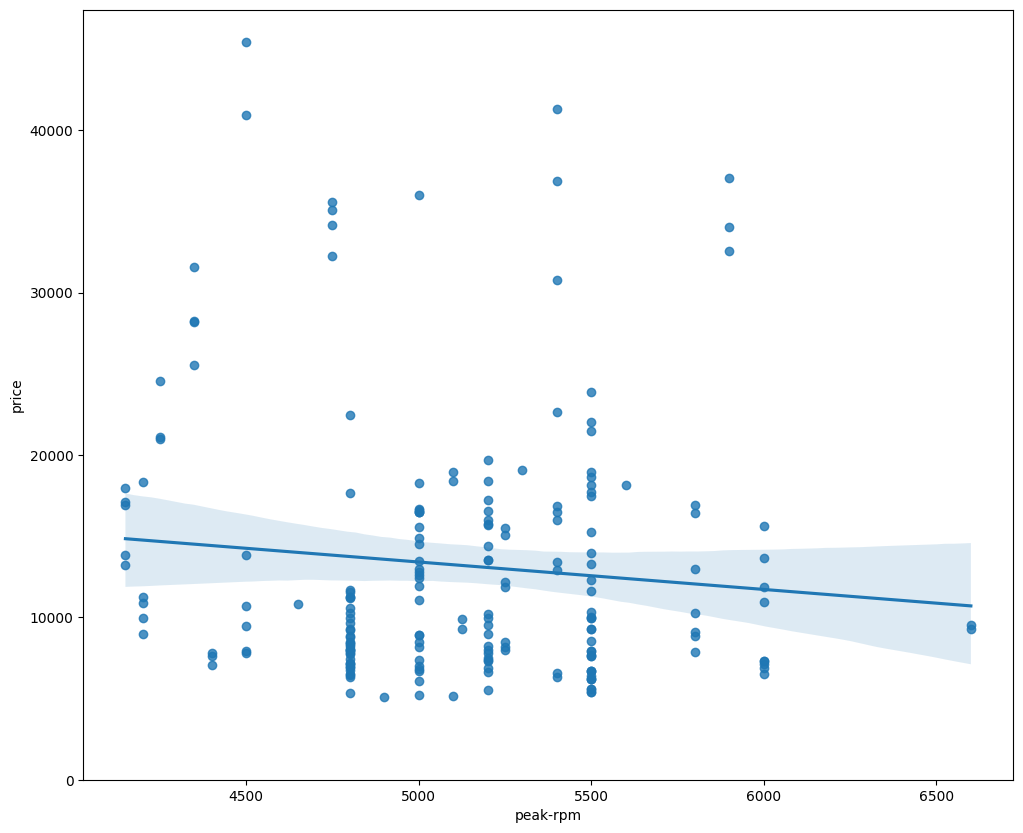

In [58]:
# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

#### <span style="color:red">Question #2 : Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.</span>

In [59]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

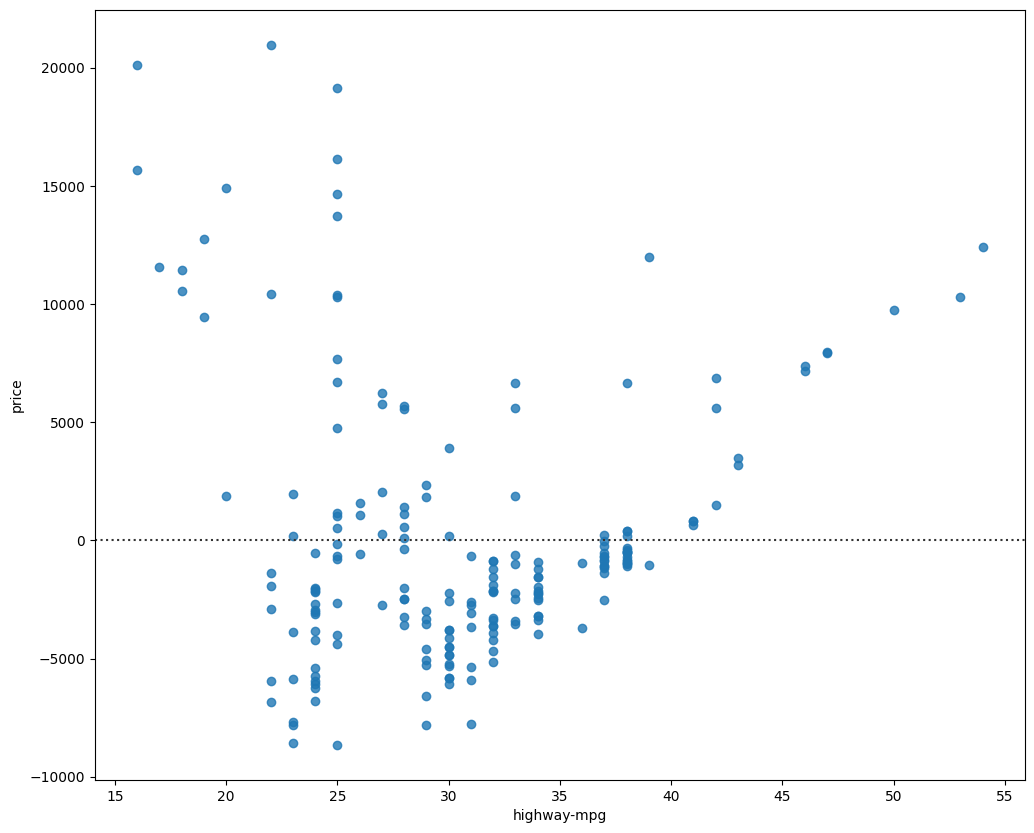

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

#### Multiple Linear Regression

In [61]:
Y_hat = lm.predict(Z)

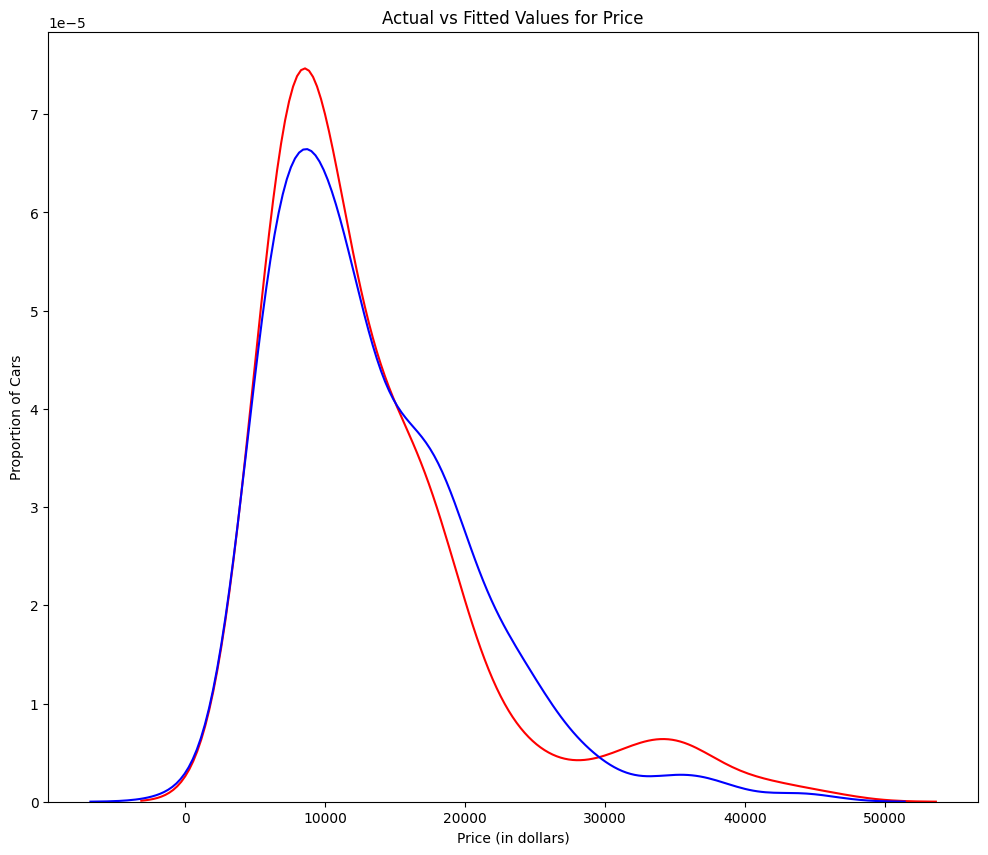

In [68]:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### 3. Polynomial Regression and Pipelines

In [69]:
# We will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()


In [70]:
# Let's get the variables:
x = df['highway-mpg']
y = df['price']

In [97]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


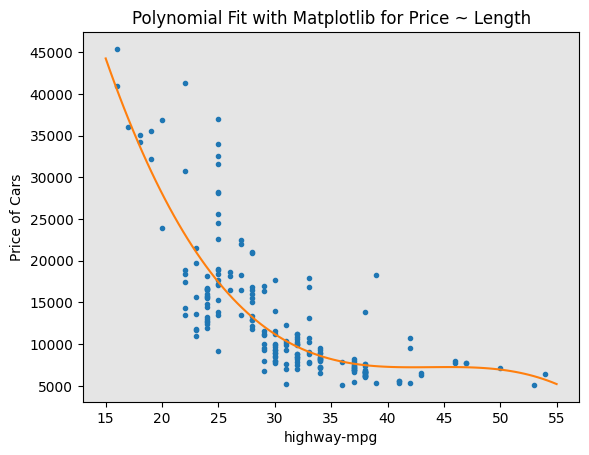

In [98]:
# Let's plot the function:
PlotPolly(p, x, y, 'highway-mpg')

In [73]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### <span style="color:red">Question #4: Create 11 order polynomial model with the variables x and y from above.
</span>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


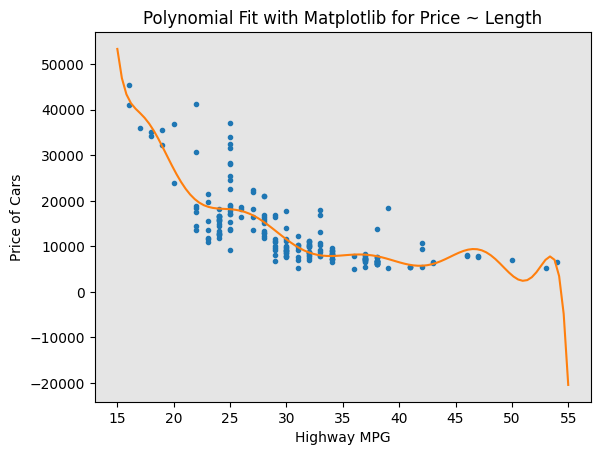

In [75]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [76]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [79]:
Z_pr=pr.fit_transform(Z)
Z_pr.shape

(201, 15)

#### Pipeline

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [82]:
# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
# we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [84]:
# we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### <span style="color:red">Question #5:Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</span>

In [85]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### 4. Measures for In-Sample Evaluation

#### Model 1: Simple Linear Regression

a) Let's calculate the R^2

In [99]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


b) Let's calculate the MSE:

In [100]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [101]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Model 2: Multiple Linear Regression

a) Let's calculate the R^2

In [102]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


b) Let's calculate the MSE

In [103]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Model 3: Polynomial Fit

a) Let's calculate the R^2.

In [104]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


b) Let's calculate the MSE

In [106]:
mean_squared_error(df['price'], p(x))

np.float64(20474146.426361218)

### 5. Prediction and Decision Making

#### Prediction

In [107]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [108]:
# Fit the model 
lm.fit(X, Y)

LinearRegression()

In [109]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

/home/justin/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

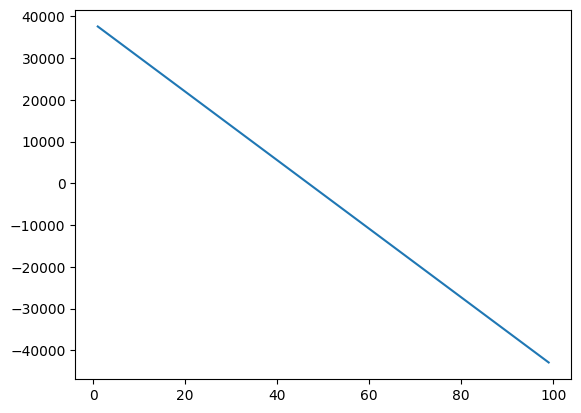

In [110]:
# We can plot the data
plt.plot(new_input, yhat)
plt.show()

#### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
- When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
- When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
- Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

#### <span style="color: green">Conclusion</span>

##### <span style="color: blue">Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</span>